In [3]:
#!pip3 install scikit-learn
from sklearn import datasets
iris = datasets.load_iris()
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [37]:
import numpy as np 
import matplotlib.pyplot as plt
x = iris.data[:,3:4]
y = (iris.target == 0).astype(int).reshape(-1,1)
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [11]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    sig = 1.0 / (1.0 + np.exp(-z))
    return sig

In [13]:
def log_loss(y, p, eps=1e-12):
    p = np.clip(p, eps, 1 - eps)
    return -np.mean(y*np.log(p) + (1-y)*np.log(1-p))

In [27]:
lr=0.1
epochs=2000 
l2=0.0,
X = np.column_stack([X, np.ones_like(X)])
m = X.shape[0]
theta = np.zeros((2,1))

In [28]:
X

array([[0.2, 1. ],
       [0.2, 1. ],
       [0.2, 1. ],
       [0.2, 1. ],
       [0.2, 1. ],
       [0.4, 1. ],
       [0.3, 1. ],
       [0.2, 1. ],
       [0.2, 1. ],
       [0.1, 1. ],
       [0.2, 1. ],
       [0.2, 1. ],
       [0.1, 1. ],
       [0.1, 1. ],
       [0.2, 1. ],
       [0.4, 1. ],
       [0.4, 1. ],
       [0.3, 1. ],
       [0.3, 1. ],
       [0.3, 1. ],
       [0.2, 1. ],
       [0.4, 1. ],
       [0.2, 1. ],
       [0.5, 1. ],
       [0.2, 1. ],
       [0.2, 1. ],
       [0.4, 1. ],
       [0.2, 1. ],
       [0.2, 1. ],
       [0.2, 1. ],
       [0.2, 1. ],
       [0.4, 1. ],
       [0.1, 1. ],
       [0.2, 1. ],
       [0.2, 1. ],
       [0.2, 1. ],
       [0.2, 1. ],
       [0.1, 1. ],
       [0.2, 1. ],
       [0.2, 1. ],
       [0.3, 1. ],
       [0.3, 1. ],
       [0.2, 1. ],
       [0.6, 1. ],
       [0.4, 1. ],
       [0.3, 1. ],
       [0.2, 1. ],
       [0.2, 1. ],
       [0.2, 1. ],
       [0.2, 1. ],
       [1.4, 1. ],
       [1.5, 1. ],
       [1.5,

In [30]:
for i in range(epochs):
    z = X @ theta               # (m,1)
    h = sigmoid(z)              # (m,1)
    grad = (X.T @ (h - y)) / m  # (2,1)  <-- from your formula
    theta -= lr * grad

    #if (i % 0 == 0 or t == epochs-1):
     #   print(f"{i:4d}  loss={log_loss(y, h):.6f}  w={theta[0,0]:.6f}  b={theta[1,0]:.6f}")

w, b = theta[0,0], theta[1,0]

In [33]:
w

np.float64(-5.989972912185251)

In [34]:
def predict_proba(x, w, b):
    x = np.asarray(x, float).reshape(-1)
    return sigmoid(w*x + b)

def predict(x, w, b, thresh=0.5):
    return (predict_proba(x, w, b) >= thresh).astype(int)


In [ ]:
rng = np.random.default_rng(0)
m = 120
xNew = np.linspace(-1, 3, m)
p = predict_proba(xNew, w, b)
print(f"\nLearned: w={w:.3f}, b={b:.3f}, loss={log_loss(p.reshape(-1,1), p.reshape(-1,1)):.4f}")


Learned: w=-5.990, b=4.280, loss=0.1361


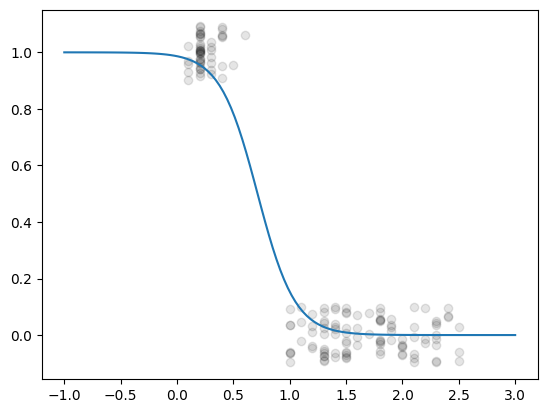

In [64]:
yJitter = y +np.random.uniform(-0.1, 0.1, size=y.shape)
plt.plot(x, yJitter, 'ok', alpha=0.1)
plt.plot(xNew,p)